In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import geopandas as gp
from shapely.geometry import Point, Polygon

In [121]:
mappingData = pd.read_csv('./full_wCoord.csv')
mappingData2 = pd.read_csv('./full_latlon.csv')
shapefile = './Ames/Ames Precincts.shp'
df_neighbourhoods=gp.read_file(shapefile)

In [122]:
mappingData2

,PID,lat,lon,dist_stadium,dist_downtown,dist_airport,coord
0,526301100,42.053808,-93.618344,4.417461,3.210441,6.102121,"(42.053808, -93.618344)"
1,526302030,42.053668,-93.618459,4.399660,3.196132,6.086080,"(42.053668, -93.618459)"
2,526302040,42.053578,-93.618276,4.395200,3.184448,6.076963,"(42.05357834520508, -93.61827582597934)"
3,526302110,42.052841,-93.618633,4.308096,3.106740,5.993553,"(42.05284062808919, -93.61863289727206)"
4,526302120,42.052853,-93.618678,4.308129,3.108530,5.994682,"(42.05285252734815, -93.61867770937495)"
...,...,...,...,...,...,...,...
2610,924100070,41.993340,-93.604119,3.646407,3.618130,1.635400,"(41.9933402, -93.6041191)"
2611,924151040,41.989746,-93.599969,4.171541,4.091171,2.118971,"(41.989745529068436, -93.59996872621437)"
2612,924151050,41.989270,-93.599962,4.209341,4.142068,2.145477,"(41.989269962685945, -93.59996163163196)"
2613,924152030,41.989203,-93.600184,4.201709,4.144171,2.133318,"(41.98920287894761, -93.60018413490596)"


In [123]:
def convert_latitude(coordinate):
    return float(str(coordinate).replace("(","").replace(")","").split(",")[0])
def convert_longitude(coordinate):
    if (len(str(coordinate).replace("(","").replace(")","").split(",")))==2:
        return float(str(coordinate).replace("(","").replace(")","").split(",")[1])
    else:
        return 0
mappingData["latitude"]=mappingData['coord'].apply(convert_latitude)
mappingData["longitude"]=mappingData['coord'].apply(convert_longitude)

In [124]:
mappingData2["latitude"]=mappingData2['coord'].apply(convert_latitude)
mappingData2["longitude"]=mappingData2['coord'].apply(convert_longitude)

<AxesSubplot:>

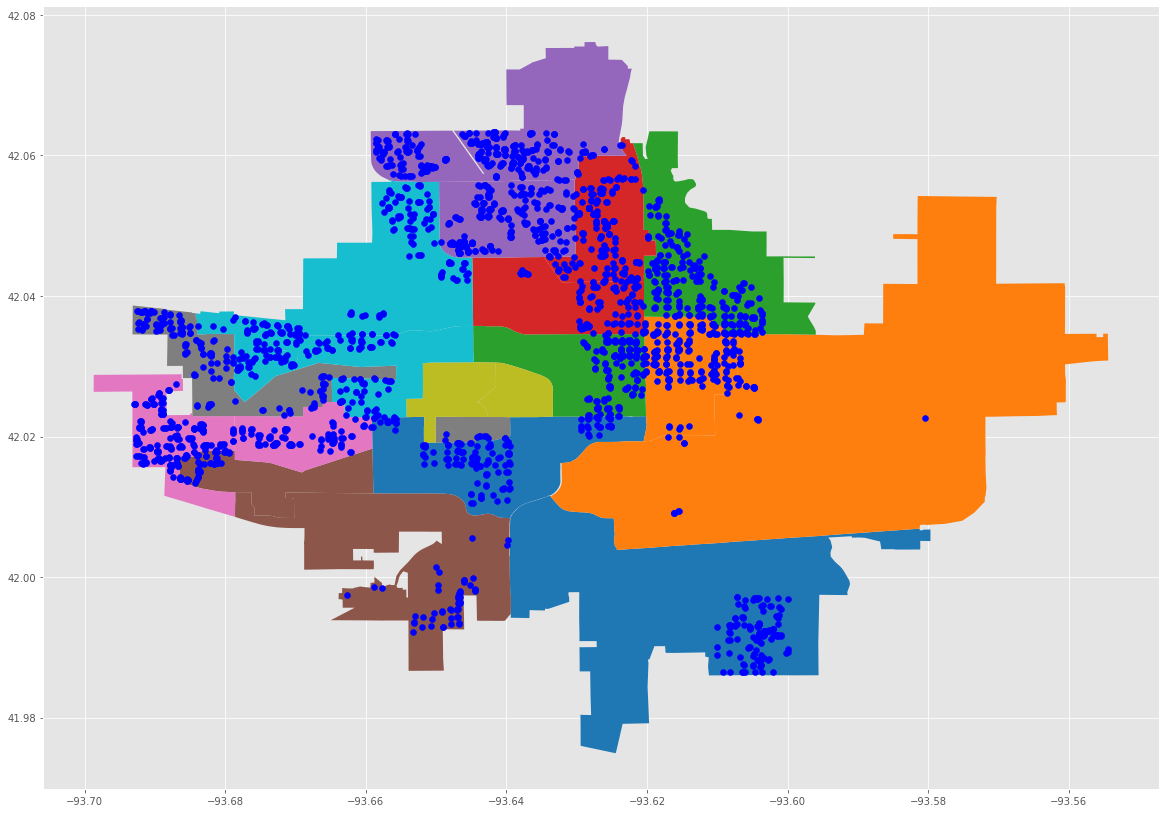

In [125]:
amesPoints = pd.DataFrame({
    'Point':mappingData['PID'].tolist(),
    'Latitude':mappingData['latitude'].tolist(),
    'Longitude':mappingData['longitude'].tolist()
})
gdf = gp.GeoDataFrame(amesPoints, geometry=gp.points_from_xy(amesPoints.Longitude, amesPoints.Latitude))
ax=df_neighbourhoods.plot(column="NAME", cmap=None,figsize=(20, 20))

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Point):
    ax.annotate("", xy=(x, y), xytext=(3, 3), textcoords="offset points")
gdf.plot(ax=ax,color="blue")

<AxesSubplot:>

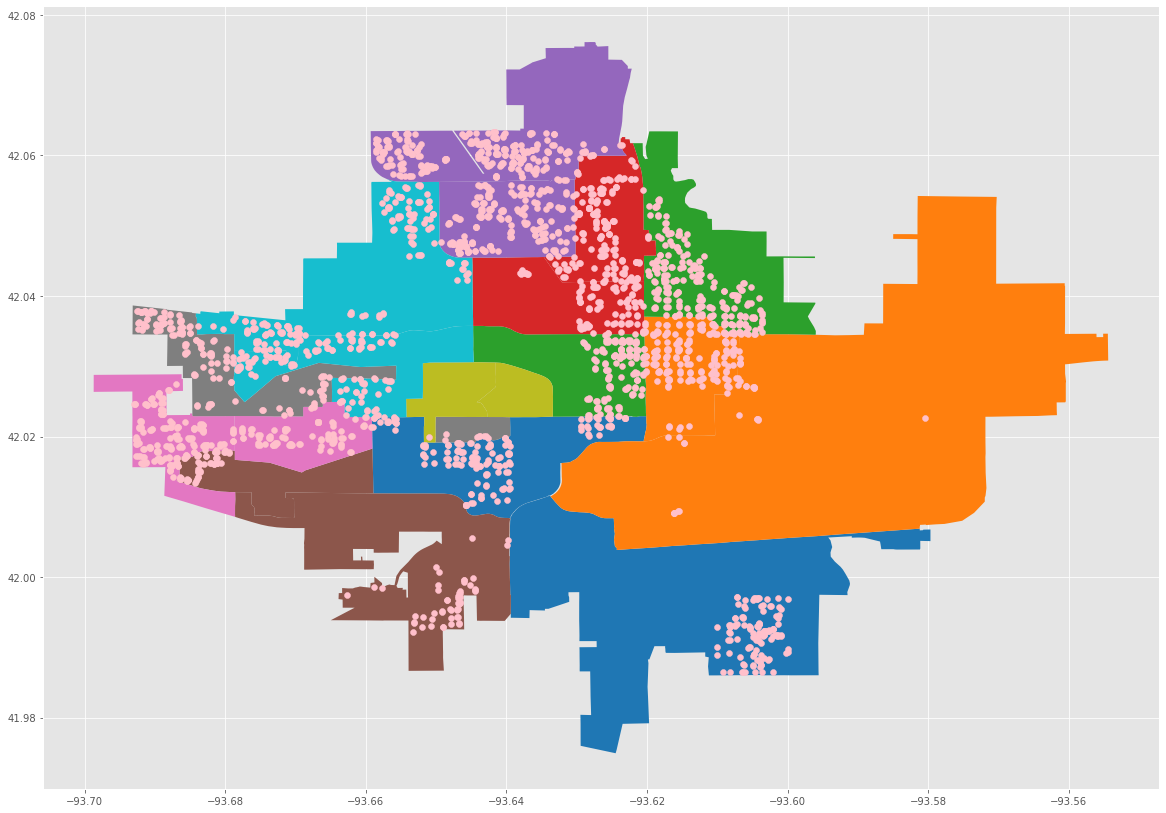

In [126]:
amesPoints2 = pd.DataFrame({
    'Point':mappingData2['PID'].tolist(),
    'Latitude':mappingData2['latitude'].tolist(),
    'Longitude':mappingData2['longitude'].tolist()
})
gdf2 = gp.GeoDataFrame(amesPoints2, geometry=gp.points_from_xy(amesPoints2.Longitude, amesPoints2.Latitude))
ax=df_neighbourhoods.plot(column="NAME", cmap=None,figsize=(20, 20))

for x, y, label in zip(gdf2.geometry.x, gdf2.geometry.y, gdf2.Point):
    ax.annotate("", xy=(x, y), xytext=(3, 3), textcoords="offset points")
gdf2.plot(ax=ax,color="pink")

<AxesSubplot:>

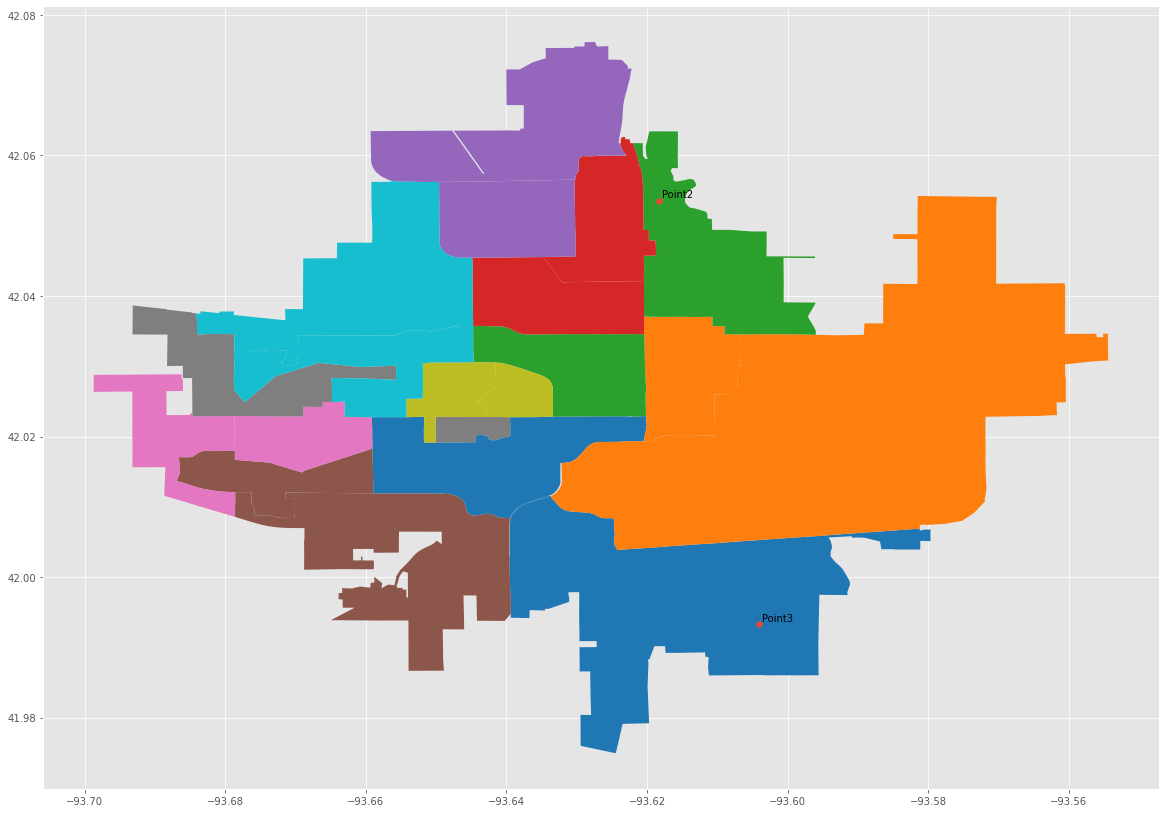

In [127]:
testPoints = pd.DataFrame({
    'Point':["Point2", "Point3"],
    'Latitude':[42.05357834520508, 41.9933402],
    'Longitude':[-93.61827582597934, -93.6041191]
})
gdf3 = gp.GeoDataFrame(testPoints, geometry=gp.points_from_xy(testPoints.Longitude, testPoints.Latitude))
ax=df_neighbourhoods.plot(column="NAME", cmap=None,figsize=(20, 30))

for x, y, label in zip(gdf3.geometry.x, gdf3.geometry.y, gdf3.Point):
    ax.annotate(label,xy=(x, y), xytext=(3, 3), textcoords="offset points")
gdf3.plot(ax=ax)